In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
data = pd.read_csv("data/file.csv", encoding='latin-1')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_13284\1052935170.py:4: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/file.csv", encoding='latin-1')


In [18]:
datas = data[data["Unit_x"] == "tonnes"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Vegetables Primary"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)

In [127]:
world = gpd.read_file("data/ne_110m_admin_0_countries.shx")
world = world.rename(index=str, columns={"SOVEREIGNT": "Area"})
world =  world[world["Area"] == world['Area'].replace({'Russia': 'Russian Federation', "Iran" : "Iran (Islamic Republic of)",  "Democratic Republic of the Congo" :"Congo", "Vietnam": "Viet Nam"})]
#world = world[world["TYPE"] == "Country"]
merged = pd.merge(datas, world, on= ["Area"], how= "outer")

In [128]:
pd.concat([world["Area"].drop_duplicates(),datas["Area"].drop_duplicates()]).drop_duplicates(keep=False)

2                              Western Sahara
6                                  Uzbekistan
12                                    Somalia
19                                The Bahamas
20                             United Kingdom
                          ...                
7788461    Venezuela (Bolivarian Republic of)
7789119                              Viet Nam
7791556                          Yugoslav SFR
7845044                   Republic of Moldova
7847884                 Serbia and Montenegro
Name: Area, Length: 76, dtype: object

In [129]:
ds=datas[datas["Area"].str.startswith('V', na=False)].drop_duplicates()
ds["Area"].drop_duplicates()

612376                                Vanuatu
7788461    Venezuela (Bolivarian Republic of)
7789119                              Viet Nam
Name: Area, dtype: object

In [130]:
wr=world[world["Area"].str.startswith('V', na=False)].drop_duplicates()
wr["Area"].drop_duplicates()

40    Venezuela
89      Vanuatu
Name: Area, dtype: object

<Axes: >

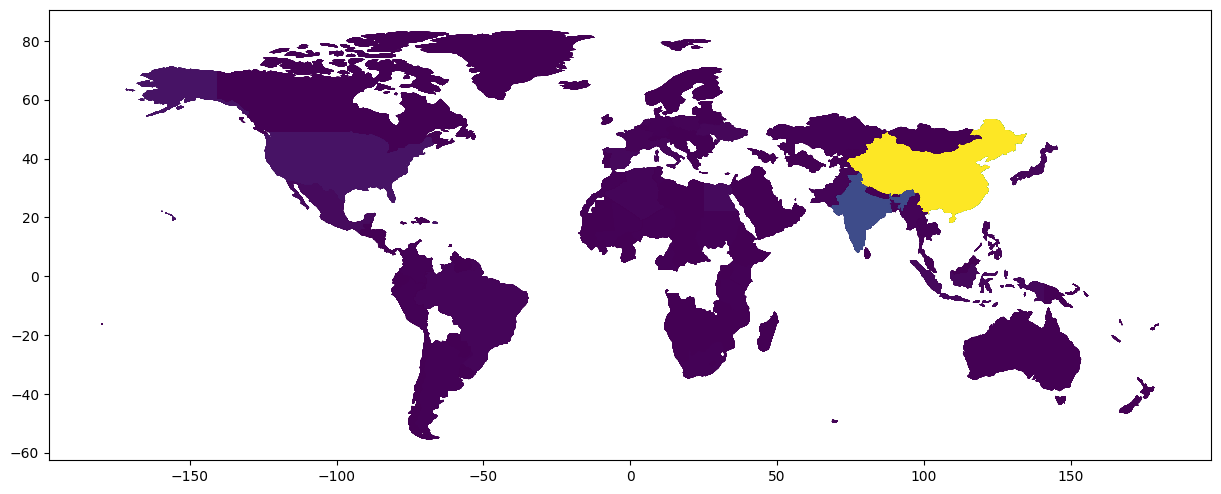

In [21]:
merged = gpd.GeoDataFrame(merged)
merged.plot("yield_amound", figsize=(15,10))

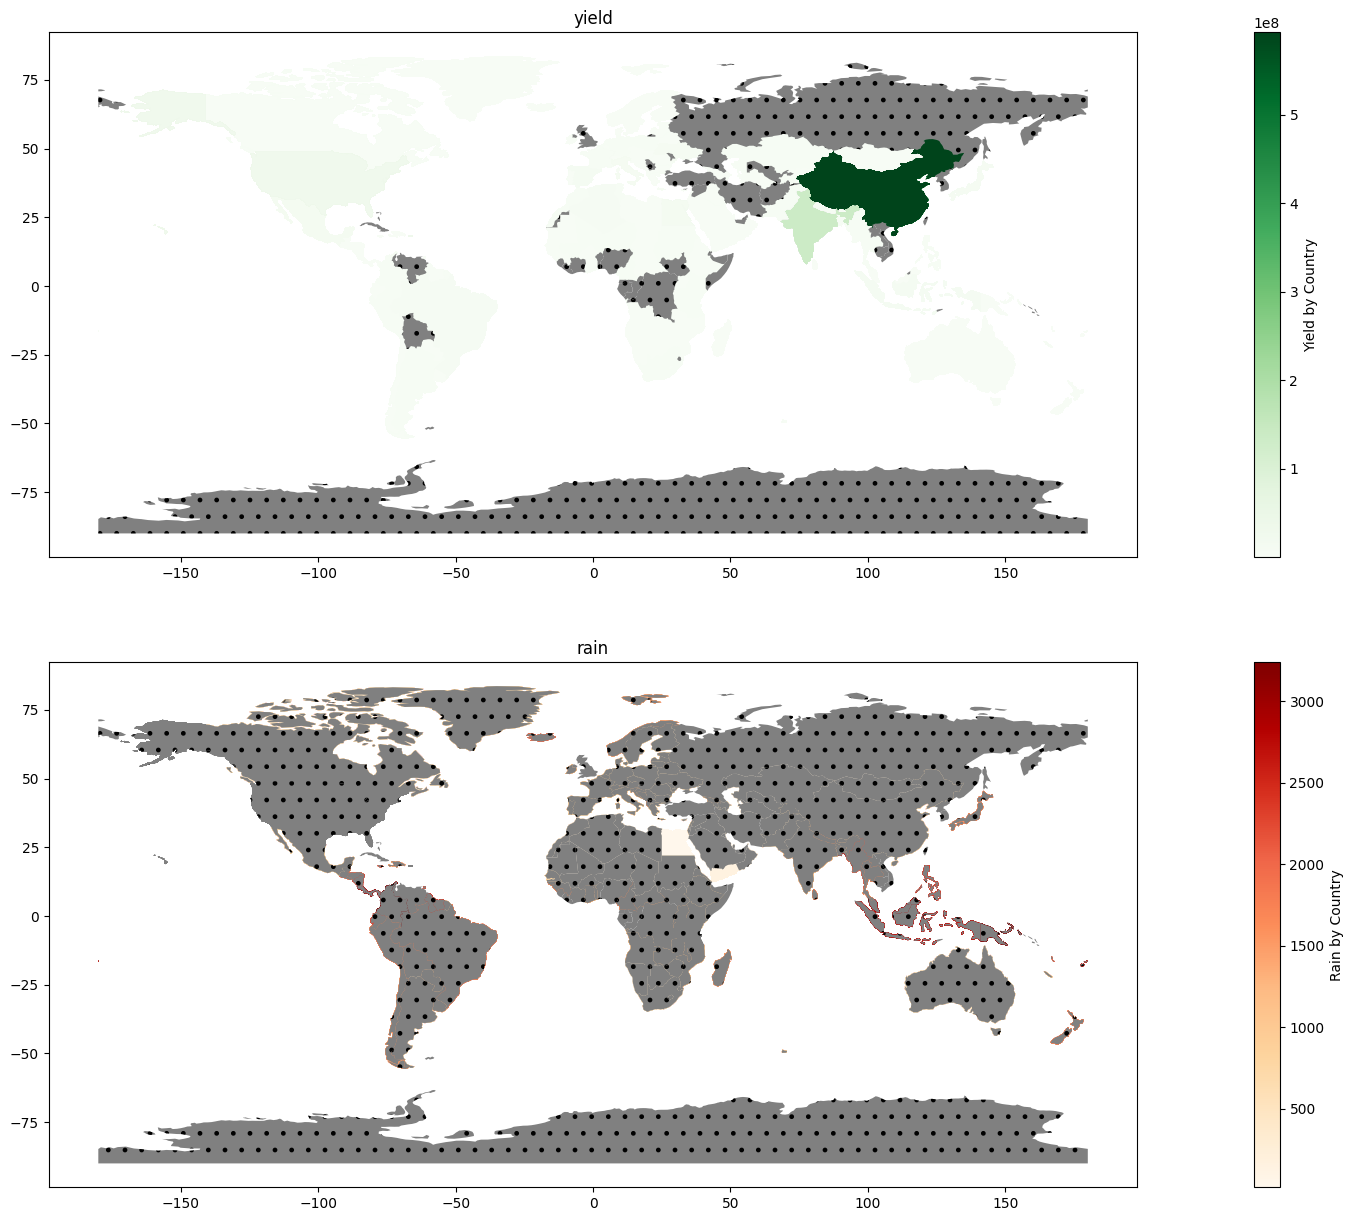

In [22]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot(211)

merged.plot("yield_amound",
                           legend=True,
                           legend_kwds={"label":"Yield by Country"},
                           cmap=plt.cm.Greens,
                           ax=ax1,
                           missing_kwds={
                               "color": "grey",
                               "hatch":"."
                           }
                          )
plt.title("yield");

ax2 = plt.subplot(212)
merged.plot("rain",
                           legend=True,
                           legend_kwds={"label":"Rain by Country"},
                           cmap=plt.cm.OrRd,
                           ax=ax2,
                           missing_kwds={
                               "color": "grey",
                               "hatch":"."
                           }
                          )
plt.title("rain");


In [23]:
#Generate a world-wide choropleth map using plotly’s choropleth function:
import plotly.express as px

fig = px.choropleth(merged,
                    locations="SOV_A3", # colunm containing ISO 3166 country codes
                    color="yield_amound", # column by which to color-code
                    hover_name="Area", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [50]:
merged

,Area,Year,rain,avg_temp,yield_amound,pesticide_amound
0,Angola,1990.0,1010.0,24.12,250000.0,64.00
2759,Nepal,1990.0,1500.0,15.11,993560.0,60.11
2728,Norway,1990.0,1414.0,4.55,178233.0,1183.00
2697,Netherlands,1990.0,778.0,10.63,3464947.0,9729.00
2666,Nicaragua,1990.0,2280.0,27.03,34700.0,575.00
...,...,...,...,...,...,...
5251,Djibouti,NaN,NaN,NaN,NaN,NaN
5252,Somaliland,NaN,NaN,NaN,NaN,NaN
5253,Republic of Serbia,NaN,NaN,NaN,NaN,NaN
5254,Kosovo,NaN,NaN,NaN,NaN,NaN


In [49]:
#Sort the dataset by Year 
merged.sort_values(by=["Year"],inplace=True)

fig = px.choropleth(merged, locations="SOV_A3",
                    color="avg_temp", # lifeExp is a column of gapminder
                    hover_name="Area", # column to add to hover information
                    animation_frame="Year", # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = '',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.update_geos(
    resolution=110,
    showcountries=True, countrycolor="RebeccaPurple"
)
#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['Area', 'Year', 'rain', 'avg_temp', 'yield_amound', 'pesticide_amound'] but received: SOV_A3